In [44]:
#Biomeng261_L1_Part1.py
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [45]:
def dydt_p(t,y,prm):
    
    # parameters 
    k1  = prm[0]
    k_1 = prm[1]
    k2  = prm[2]
    k3 = prm[3]
    k_3 = prm[4]
    k4 = prm[5]

    # variables
    s = y[0]
    e = y[1]
    c_1 = y[2] 
    c_2 = y[3]
    p = y[4]

    j1 =  k1 * s * e
    j_1 = k_1 * c_1
    j2 = k2 * c_1
    j3 = k3 * s * c_1
    j_3 = k_3 * c_2
    j4 = k4 * c_2

    dydt = np.zeros(5)
    dydt[0] = -j1 + j_1 - j3 + j_3
    dydt[1] = -j_1 + j_1 + j2 
    dydt[2] = j_1 - j_1 - j2 -j3 + j_3 + j4
    dydt[3] = j3 - j_3 - j4
    # dydt[4] = j2 + j4
    dydt[4] = k2 * c_1 +  k4 * c_2

    return dydt

In [46]:
dydt = lambda t, y: dydt_p(t,y,[2.0, 11.0, 5.0, 9.0, 21.0, 11.0])

In [47]:
# Parameters
#               k1  k-1 k2 k3 k_3 k4
prm = np.array([2.0, 11.0, 5.0, 9.0, 21.0, 11.0])

In [48]:
# Initial conditions (uM)
S0 = 15.0
E0 = 0.5
# E0 = 1
C1_0 = 0.0
C2_0 = 0.0
P0 = 0.0

y0 = np.array([S0,E0,C1_0,C2_0,P0])

In [49]:
#note: dense output lets us choose how fine to plot the solution 
solution_object = solve_ivp(fun=dydt,t_span=[0,10],y0=y0,dense_output=True)
sol = solution_object.sol

In [50]:
t_sol = np.linspace(0,10,1000)
y_sol = sol(t_sol)

In [51]:
y_sol.shape

(5, 1000)

In [52]:
s = y_sol[0,:]
e = y_sol[1,:]
c_1 = y_sol[2,:]
c_2 = y_sol[3,:] 
p = y_sol[4,:] 

print(y_sol)


[[1.50000000e+01 1.48505988e+01 1.47026857e+01 ... 7.04756038e-04
  6.97737222e-04 6.90787915e-04]
 [5.00000000e-01 5.00000000e-01 5.00000000e-01 ... 5.00000000e-01
  5.00000000e-01 5.00000000e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


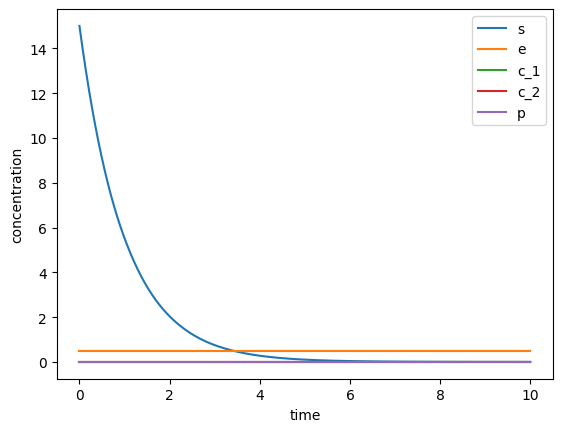

In [53]:
plt.plot(t_sol,s,label='s')
plt.plot(t_sol,e,label='e')
plt.plot(t_sol,c_1,label='c_1')
plt.plot(t_sol,c_2,label='c_2')
plt.plot(t_sol,p,label='p')

plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()
